In [2]:
!pip install catboost

     |████████████████████████████████| 65.7MB 57kB/s 


In [3]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
import multiprocessing
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.metrics import make_scorer, accuracy_score

from catboost import CatBoostRegressor, Pool

import xgboost as xgb

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import VotingRegressor

# Plot
# ==============================================================================

from xgboost import plot_tree


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

# Descarga del target
# ==============================================================================
from google.colab import files

#Primer DataFrame

In [ ]:
DataFrame2 = pd.read_csv('/content/short_df_Encoded.csv')

In [ ]:
DataFrame2.head()

,Unnamed: 0,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision
0,0,0.0,0.0,1.0,0.0,0.0,15.635076,10.0,1.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,10.940740,0.0,0.0,0.0,1.0
2,2,0.0,1.0,0.0,0.0,0.0,11.336971,0.0,0.0,0.0,1.0
3,3,0.0,1.0,0.0,0.0,0.0,15.819943,14.0,0.0,1.0,0.0
4,4,0.0,1.0,0.0,0.0,0.0,16.407566,25.0,0.0,1.0,0.0


In [ ]:
DataFrame2.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
DataFrame2.head()

,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Total_Amount,TRF,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision
0,0.0,0.0,1.0,0.0,0.0,15.635076,10.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,10.940740,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,11.336971,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,15.819943,14.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,16.407566,25.0,0.0,1.0,0.0


In [ ]:
DataFrame2Train = DataFrame2.loc[:,DataFrame2.columns != 'Decision']

In [ ]:
DataFrame2Test  =  DataFrame2.loc[:,'Decision']

In [ ]:
DataFrame2Train.shape, DataFrame2Test.shape, DataFrame2.shape

((16772, 9), (16772,), (16772, 10))

##LightGBM


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
model = LGBMRegressor(boosting_type = "goss", n_estimators = 1100, learning_rate = 0.008, random_state = 123)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
preds = model.predict(x_test)

In [ ]:
loss = log_loss(y_test, preds)
loss

In [ ]:
#val = model.feature_importances_

In [ ]:
#df = pd.DataFrame(val)

In [ ]:
#df.columns = ["Value"]
#df.sort_values(by = "Value").plot.bar()

##Catboost

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
modelCatReg1 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.007)

#Entreno al modelo
modelCatReg1.fit(x_train2, y_train2)
#Predicciones
preds_CatReg = modelCatReg1.predict(x_test2)
print("CatReg = ", preds_CatReg)

0:	learn: 0.4939131	total: 51.5ms	remaining: 1m 17s
1:	learn: 0.4927485	total: 54.4ms	remaining: 40.7s
2:	learn: 0.4915755	total: 57ms	remaining: 28.5s
3:	learn: 0.4904074	total: 59.7ms	remaining: 22.3s
4:	learn: 0.4892143	total: 62.3ms	remaining: 18.6s
5:	learn: 0.4880268	total: 64.9ms	remaining: 16.2s
6:	learn: 0.4868536	total: 67.5ms	remaining: 14.4s
7:	learn: 0.4857370	total: 70ms	remaining: 13.1s
8:	learn: 0.4846057	total: 72.5ms	remaining: 12s
9:	learn: 0.4834679	total: 75.1ms	remaining: 11.2s
10:	learn: 0.4823718	total: 77.7ms	remaining: 10.5s
11:	learn: 0.4812722	total: 80.3ms	remaining: 9.95s
12:	learn: 0.4801667	total: 82.9ms	remaining: 9.49s
13:	learn: 0.4790675	total: 85.5ms	remaining: 9.08s
14:	learn: 0.4779984	total: 88.1ms	remaining: 8.72s
15:	learn: 0.4769706	total: 90.6ms	remaining: 8.4s
16:	learn: 0.4759180	total: 93.2ms	remaining: 8.13s
17:	learn: 0.4748625	total: 95.8ms	remaining: 7.89s
18:	learn: 0.4738212	total: 98.7ms	remaining: 7.69s
19:	learn: 0.4728012	total: 

In [ ]:
#Error del modelo
rmse1 = np.sqrt(mean_squared_error(y_test2, preds_CatReg))
print("RMSE: %f" % (rmse1))

RMSE: 0.375398


In [ ]:
accuracy1 = accuracy_score(y_test2, preds_CatReg.round().astype('int'))
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 79.73%


In [ ]:
lossCat = log_loss(y_test2, preds_CatReg)
lossCat

0.43018030392205603

##Xgboost

In [ ]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
xg_Regressor1 = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)

In [ ]:
xg_Regressor1.fit(x_train5,y_train5)

In [ ]:
predsRegressor1 = xg_Regressor1.predict(x_test5)

In [ ]:
value_pred_Regressor1 = pd.DataFrame()
value_pred_Regressor1['pred'] = predsRegressor1
value_pred_Regressor1['pred'].value_counts()

In [ ]:
rmseRegressor1 = np.sqrt(mean_squared_error(y_test5, predsRegressor1))
print("RMSE: %f" % (rmseRegressor1))

In [ ]:
lossRegressor1 = log_loss(y_test5, predsRegressor1)
print(f"Log Loss is {lossRegressor1}")

#Segundo DataFrame


In [5]:
DataFrame3 = pd.read_csv('/content/DataFrame_train_encoded1.csv')

In [6]:
DataFrame3.head()

,Unnamed: 0,Total_Amount,Delivery_Year,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision,Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East
0,0,15.635076,2016,1,1,0,0,1,0,0,0,1,0,0,0
1,1,10.940740,2016,0,0,1,1,0,0,0,0,1,0,0,0
2,2,11.336971,2016,0,0,1,1,0,0,0,0,0,1,0,0
3,3,15.819943,2018,0,1,0,1,0,0,0,0,0,1,0,0
4,4,16.407566,2018,0,1,0,1,0,0,0,0,0,1,0,0


In [7]:
DataFrame3.drop(columns = {'Unnamed: 0'}, inplace = True)

In [8]:
DataFrame3.head()

,Total_Amount,Delivery_Year,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision,Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East
0,15.635076,2016,1,1,0,0,1,0,0,0,1,0,0,0
1,10.940740,2016,0,0,1,1,0,0,0,0,1,0,0,0
2,11.336971,2016,0,0,1,1,0,0,0,0,0,1,0,0
3,15.819943,2018,0,1,0,1,0,0,0,0,0,1,0,0
4,16.407566,2018,0,1,0,1,0,0,0,0,0,1,0,0


In [9]:
DataFrame3Train = DataFrame3.loc[:,DataFrame3.columns != 'Decision']

In [10]:
DataFrame3Test  =  DataFrame3.loc[:,'Decision']

In [11]:
DataFrame3Train.shape, DataFrame3Test.shape, DataFrame3.shape

((16772, 13), (16772,), (16772, 14))

##LightGBM

In [37]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [38]:
modelLGBMReg2 = LGBMRegressor(boosting_type = "goss", n_estimators = 200, learning_rate = 0.1, random_state = 123)

In [ ]:
modelLGBMReg2.fit(x_train3, y_train3)

LGBMRegressor(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predsLGBMReg2 = modelLGBMReg2.predict(x_test3)

In [ ]:
loss = log_loss(y_test3, predsLGBMReg2)
loss

0.6880196436656328

##Catboost

In [34]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [35]:
modelCatReg2 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)

In [ ]:
#Entreno al modelo
modelCatReg2.fit(x_train4, y_train4)

In [ ]:
preds_CatReg2 = modelCatReg2.predict(x_test4)
print("CatReg = ", preds_CatReg2)

In [ ]:
#Error del modelo
rmse2 = np.sqrt(mean_squared_error(y_test4, preds_CatReg2))
print("RMSE: %f" % (rmse2))

RMSE: 0.359581


In [ ]:
accuracy2 = accuracy_score(y_test4, preds_CatReg2.round().astype('int'))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 80.63%


In [ ]:
lossCat2 = log_loss(y_test4, preds_CatReg2)
lossCat2

0.3976465471847935

##Xgboost

In [13]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [14]:
xg_Regressor2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 280, subsample= 0.8)

In [ ]:
xg_Regressor2.fit(x_train6,y_train6)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=280,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
predsRegressor2 = xg_Regressor2.predict(x_test6)

In [ ]:
value_pred_Regressor2 = pd.DataFrame()
value_pred_Regressor2['pred'] = predsRegressor2
value_pred_Regressor2['pred'].value_counts()

0.046646    62
0.994301    29
0.949301    26
0.073651    21
0.947830    19
            ..
0.815408     1
0.336826     1
0.462174     1
0.923647     1
0.613282     1
Name: pred, Length: 2478, dtype: int64

In [ ]:
rmseRegressor2 = np.sqrt(mean_squared_error(y_test6, predsRegressor2))
print("RMSE: %f" % (rmseRegressor2))

RMSE: 0.356058


In [ ]:
lossRegressor2 = log_loss(y_test6, predsRegressor2)
print(f"Log Loss is {lossRegressor2}")

Log Loss is 0.401787939232298


##Adaboost

###Xgboost

In [16]:
ada = AdaBoostRegressor(xg_Regressor2, learning_rate = 0.001)

In [17]:
ada.fit(x_train6,y_train6)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8, gamma=1.5,
                                              importance_type='gain',
                                              learning_rate=0.01,
                                              max_delta_step=0, max_depth=20,
                                              min_child_weight=1, missing=None,
                                              n_estimators=280, n_jobs=1,
                                              nthread=None,
                                              objective='reg:squarederror',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              see

In [19]:
predsadaregressor1 = ada.predict(x_test6)

In [20]:
value_pred_Regressor2 = pd.DataFrame()
value_pred_Regressor2['pred'] = predsadaregressor1
value_pred_Regressor2['pred'].value_counts()

0.049709    24
0.050321    23
0.950653    18
0.951779    18
0.950188    15
            ..
0.799396     1
0.533767     1
0.881421     1
0.529856     1
0.291016     1
Name: pred, Length: 2661, dtype: int64

In [21]:
rmseAdaRegressor1 = np.sqrt(mean_squared_error(y_test6, predsadaregressor1))
print("RMSE: %f" % (rmseAdaRegressor1))

RMSE: 0.353561


In [22]:
lossAdaRegressor1 = log_loss(y_test6, predsadaregressor1)
print(f"Log Loss is {lossAdaRegressor1}")

Log Loss is 0.3973014913274505


###LIGHTGBM

In [36]:
ada2 = AdaBoostRegressor(modelCatReg2,learning_rate = 0.001)

###Catboost

In [41]:
ada3 = AdaBoostRegressor(modelLGBMReg2, learning_rate = 0.001 )

###VotingRegressor de los 3 modelos

In [63]:
vot_3modelos_reg = VotingRegressor([('xgb',ada), ('lgbm',ada2)])

In [64]:
vot_3modelos_reg.fit(x_train6,y_train6)

Se han truncado las últimas 5000 líneas del flujo de salida.
1000:	learn: 0.3603463	total: 3.46s	remaining: 1.73s
1001:	learn: 0.3603315	total: 3.47s	remaining: 1.72s
1002:	learn: 0.3603193	total: 3.47s	remaining: 1.72s
1003:	learn: 0.3603027	total: 3.48s	remaining: 1.72s
1004:	learn: 0.3602955	total: 3.48s	remaining: 1.71s
1005:	learn: 0.3602780	total: 3.48s	remaining: 1.71s
1006:	learn: 0.3602574	total: 3.49s	remaining: 1.71s
1007:	learn: 0.3602416	total: 3.49s	remaining: 1.71s
1008:	learn: 0.3602240	total: 3.5s	remaining: 1.7s
1009:	learn: 0.3602077	total: 3.5s	remaining: 1.7s
1010:	learn: 0.3602012	total: 3.5s	remaining: 1.69s
1011:	learn: 0.3601829	total: 3.51s	remaining: 1.69s
1012:	learn: 0.3601670	total: 3.52s	remaining: 1.69s
1013:	learn: 0.3601597	total: 3.52s	remaining: 1.69s
1014:	learn: 0.3601515	total: 3.52s	remaining: 1.68s
1015:	learn: 0.3601343	total: 3.53s	remaining: 1.68s
1016:	learn: 0.3601221	total: 3.53s	remaining: 1.68s
1017:	learn: 0.3601077	total: 3.54s	remaini

VotingRegressor(estimators=[('xgb',
                             AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5,
                                                                           booster='gbtree',
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=1,
                                                                           colsample_bytree=0.8,
                                                                           gamma=1.5,
                                                                           importance_type='gain',
                                                                           learning_rate=0.01,
                                                                           max_delta_step=0,
                                                                           max_depth=20,
                              

In [65]:
preds_vot_3mod = vot_3modelos_reg.predict(x_test6)

In [66]:
value_pred_vot_Regressor3_mod = pd.DataFrame()
value_pred_vot_Regressor3_mod['pred'] = preds_vot_3mod
value_pred_vot_Regressor3_mod['pred'].value_counts()

0.028742    23
0.028950    22
0.959418    16
0.960333    16
0.959207    15
            ..
0.788793     1
0.545980     1
0.471752     1
0.039181     1
0.264120     1
Name: pred, Length: 2710, dtype: int64

In [67]:
rmseRegressorvot_3mod = np.sqrt(mean_squared_error(y_test6, preds_vot_3mod))
print("RMSE: %f" % (rmseRegressorvot_3mod))

RMSE: 0.354857


In [68]:
lossRegressorvot_3mod = log_loss(y_test6, preds_vot_3mod)
print(f"Log Loss is {lossRegressorvot_3mod}")

Log Loss is 0.3947272127957283


##VotingRegressor

In [ ]:
reg1 = xg_Regressor2

In [ ]:
reg2 = modelCatReg2

In [ ]:
vot_reg = VotingRegressor([('xg',reg1),('cat',reg2)])

In [ ]:
vot_reg.fit(x_train6,y_train6)

0:	learn: 0.4825875	total: 3.5ms	remaining: 5.25s
1:	learn: 0.4716594	total: 7.55ms	remaining: 5.65s
2:	learn: 0.4616356	total: 11.3ms	remaining: 5.66s
3:	learn: 0.4526947	total: 14.9ms	remaining: 5.59s
4:	learn: 0.4446109	total: 18.9ms	remaining: 5.65s
5:	learn: 0.4374189	total: 22.2ms	remaining: 5.54s
6:	learn: 0.4312617	total: 25.1ms	remaining: 5.36s
7:	learn: 0.4260709	total: 28.1ms	remaining: 5.23s
8:	learn: 0.4211409	total: 31.4ms	remaining: 5.2s
9:	learn: 0.4169553	total: 34.6ms	remaining: 5.15s
10:	learn: 0.4130205	total: 37.6ms	remaining: 5.08s
11:	learn: 0.4100045	total: 40.1ms	remaining: 4.97s
12:	learn: 0.4068812	total: 43.5ms	remaining: 4.98s
13:	learn: 0.4036691	total: 47ms	remaining: 4.98s
14:	learn: 0.4010980	total: 50.2ms	remaining: 4.97s
15:	learn: 0.3988490	total: 53.9ms	remaining: 5s
16:	learn: 0.3966865	total: 57.4ms	remaining: 5.01s
17:	learn: 0.3946443	total: 60.7ms	remaining: 5s
18:	learn: 0.3929054	total: 63.9ms	remaining: 4.98s
19:	learn: 0.3915262	total: 67.1

VotingRegressor(estimators=[('xg',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.8, gamma=1.5,
                                          importance_type='gain',
                                          learning_rate=0.01, max_delta_step=0,
                                          max_depth=20, min_child_weight=1,
                                          missing=None, n_estimators=280,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=0.8,
                           

In [ ]:
preds_vot = vot_reg.predict(x_test6)

In [ ]:
value_pred_vot_Regressor1 = pd.DataFrame()
value_pred_vot_Regressor1['pred'] = preds_vot
value_pred_vot_Regressor1['pred'].value_counts()

0.027894    23
0.024682    22
0.966167    18
0.968671    16
0.962552    15
            ..
0.713643     1
0.440160     1
0.909722     1
0.468921     1
0.408192     1
Name: pred, Length: 2636, dtype: int64

In [ ]:
rmseRegressorvot1 = np.sqrt(mean_squared_error(y_test6, preds_vot))
print("RMSE: %f" % (rmseRegressorvot1))

RMSE: 0.349852


In [ ]:
lossRegressorvot1 = log_loss(y_test6, preds_vot)
print(f"Log Loss is {lossRegressorvot1}")

Log Loss is 0.3840866472058172


##Test

In [23]:
DataFrameTest3 = pd.read_csv('/content/DataFrame_test_encoded1.csv')

In [24]:
DataFrameTest3.head()

,Unnamed: 0,Opportunity_ID,Total_Amount,Delivery_Year,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East
0,2,10689,11.905436,2019,1,1,0,1,0,0,0,1,0,0,0
1,7,10690,11.787392,2019,1,1,0,1,0,0,0,1,0,0,0
2,8,10691,9.954062,2019,1,1,0,0,0,1,0,0,1,0,0
3,14,10692,12.338534,2019,1,1,0,0,0,1,0,0,1,0,0
4,15,10693,8.657390,2019,0,0,0,1,0,0,0,0,1,0,0


In [25]:
DataFrameTest3.drop(columns = {'Unnamed: 0'}, inplace = True)

In [26]:
DataFrameTest3.head()

,Opportunity_ID,Total_Amount,Delivery_Year,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East
0,10689,11.905436,2019,1,1,0,1,0,0,0,1,0,0,0
1,10690,11.787392,2019,1,1,0,1,0,0,0,1,0,0,0
2,10691,9.954062,2019,1,1,0,0,0,1,0,0,1,0,0
3,10692,12.338534,2019,1,1,0,0,0,1,0,0,1,0,0
4,10693,8.657390,2019,0,0,0,1,0,0,0,0,1,0,0


In [27]:
DescargaPredVotRegressor2 = pd.DataFrame()
DescargaPredVotRegressor2['Opportunity_ID'] = DataFrameTest3['Opportunity_ID']
DescargaPredVotRegressor2.set_index('Opportunity_ID', inplace = True)

In [28]:
DataFrameTest3 = DataFrameTest3.drop(columns={'Opportunity_ID'})
DataFrameTest3.head()

,Total_Amount,Delivery_Year,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Delivery_Quarter_1,Delivery_Quarter_2,Delivery_Quarter_3,Delivery_Quarter_4,Region_Japon,Region_EMEA,Region_Americas,Region_Apac,Region_Middle_East
0,11.905436,2019,1,1,0,1,0,0,0,1,0,0,0
1,11.787392,2019,1,1,0,1,0,0,0,1,0,0,0
2,9.954062,2019,1,1,0,0,0,1,0,0,1,0,0
3,12.338534,2019,1,1,0,0,0,1,0,0,1,0,0
4,8.657390,2019,0,0,0,1,0,0,0,0,1,0,0


In [69]:
predvotTest2 = vot_3modelos_reg.predict(DataFrameTest3)

In [70]:
DescargaPredVotRegressor2['target'] = predvotTest2
DescargaPredVotRegressor2

,target
Opportunity_ID,
10689,0.387929
10690,0.423903
10691,0.597006
10692,0.440079
10693,0.572400
...,...
12364,0.438709
12365,0.558083
12366,0.647381


In [71]:
DescargaPredVotRegressor2['target'].describe()

count    1567.000000
mean        0.477849
std         0.208533
min         0.003875
25%         0.317082
50%         0.503471
75%         0.638125
max         0.888648
Name: target, dtype: float64

In [72]:
csv4 = DescargaPredVotRegressor2.to_csv('vot_regression_pred2.csv')
files.download('vot_regression_pred2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Tercer DataFrame

In [17]:
short_df = pd.read_csv( "/content/short_df_train_encoded_4.csv" )

In [18]:
short_df.head()

,Opportunity_ID,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,Decision
0,0,15.635076,1,12,0.186992,0.560776,0
1,1,10.940740,1,12,0.592975,0.750000,1
2,19,12.624960,1,12,0.561404,0.261905,0
3,20,11.702880,1,12,0.592975,0.664537,1
4,23,12.433069,1,12,0.592975,0.560776,1


In [19]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(
                                        short_df.drop(columns = 'Decision'),
                                        short_df['Decision'],
                                        random_state = 123
                                    )

In [20]:
X_train7.shape, X_test7.shape, y_train7.shape, y_test7.shape

((10187, 6), (3396, 6), (10187,), (3396,))

##Catboost

In [27]:
modelCatReg3 = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 1500, max_depth = 16)

In [28]:
modelCatReg3.fit(X_train7, y_train7)

0:	learn: 0.4956229	total: 1.38s	remaining: 34m 32s
1:	learn: 0.4941426	total: 2.13s	remaining: 26m 39s
2:	learn: 0.4926921	total: 2.87s	remaining: 23m 51s
3:	learn: 0.4912821	total: 3.59s	remaining: 22m 21s
4:	learn: 0.4899263	total: 4.33s	remaining: 21m 33s
5:	learn: 0.4885555	total: 5.04s	remaining: 20m 53s
6:	learn: 0.4872137	total: 5.79s	remaining: 20m 34s
7:	learn: 0.4858374	total: 6.53s	remaining: 20m 17s
8:	learn: 0.4845138	total: 7.19s	remaining: 19m 51s
9:	learn: 0.4831716	total: 7.94s	remaining: 19m 43s
10:	learn: 0.4818197	total: 8.67s	remaining: 19m 33s
11:	learn: 0.4805117	total: 9.42s	remaining: 19m 28s
12:	learn: 0.4792103	total: 10.2s	remaining: 19m 21s
13:	learn: 0.4779420	total: 10.9s	remaining: 19m 12s
14:	learn: 0.4767076	total: 11.5s	remaining: 19m 1s
15:	learn: 0.4755061	total: 12.3s	remaining: 18m 57s
16:	learn: 0.4742706	total: 13s	remaining: 18m 53s
17:	learn: 0.4730196	total: 13.7s	remaining: 18m 51s
18:	learn: 0.4717998	total: 14.5s	remaining: 18m 47s
19:	le

In [29]:
preds_CatReg3 = modelCatReg3.predict(X_test7)

In [30]:
#Error del modelo
rmsecat3 = np.sqrt(mean_squared_error(y_test7, preds_CatReg3))
print("RMSE: %f" % (rmsecat3))

RMSE: 0.358687


In [31]:
losscat3 = log_loss(y_test7, preds_CatReg3)
losscat3

0.4572596287410401

##Lightgbm


In [ ]:
lgbm3 = LGBMRegressor(boosting_type = "goss", n_estimators = 700, learning_rate = 0.1, random_state = 123)

In [ ]:
lgbm3.fit(X_train7, y_train7)

In [ ]:
predslgbm3 = lgbm3.predict(X_test7)

In [ ]:
value_pred_lgbm_Regressor3 = pd.DataFrame()
value_pred_lgbm_Regressor3['pred'] = predslgbm3
value_pred_lgbm_Regressor3['pred'].describe()

In [ ]:
rmselgbmRegressor3 = np.sqrt(mean_squared_error(y_test7, predslgbm3))
print("RMSE: %f" % (rmselgbmRegressor3))

In [ ]:
losslgbmRegressor3 = log_loss(y_test7, predslgbm3)
print(f"Log Loss is {losslgbmRegressor3}")

##Xgboost

In [39]:
xg_Regressor3 = xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.001, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)

In [40]:
xg_Regressor3.fit(X_train7, y_train7)

[18:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [41]:
predsRegressor3 = xg_Regressor3.predict(X_test7)

In [ ]:
value_pred_Regressor3 = pd.DataFrame()
value_pred_Regressor3['pred'] = predsRegressor3
value_pred_Regressor3['pred'].value_counts()

0.417617    13
0.419321     6
0.417678     6
0.551609     5
0.474670     4
            ..
0.567697     1
0.434123     1
0.552563     1
0.553160     1
0.557619     1
Name: pred, Length: 347, dtype: int64

In [ ]:
rmseRegressor3 = np.sqrt(mean_squared_error(y_test7, predsRegressor3))
print("RMSE: %f" % (rmseRegressor3))

RMSE: 0.461623


In [ ]:
lossRegressor3 = log_loss(y_test7, predsRegressor3)
print(f"Log Loss is {lossRegressor3}")

Log Loss is 0.6188645214206724


###Plot

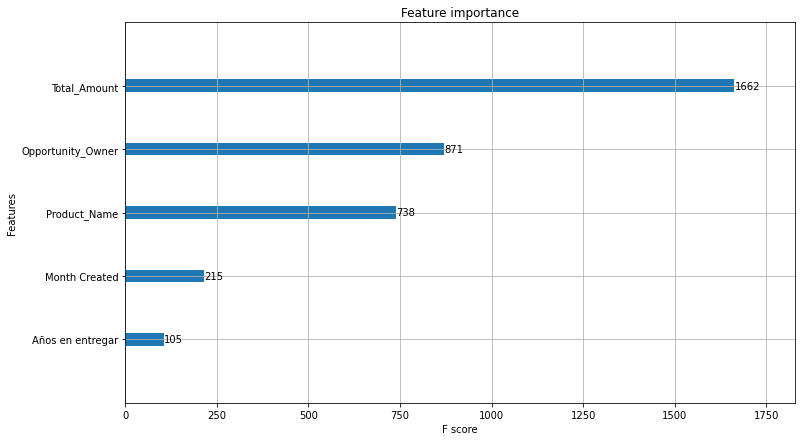

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
xgb.plot_importance(xg_Regressor3)

##VotingRegressor

In [ ]:
#reg3 = xg_Regressor3

In [ ]:
#reg4 = modelCatReg3

In [ ]:
#reg5 = modelLGBMReg3

In [ ]:
#vot_reg2 = VotingRegressor([('xg',reg3),('cat',reg4)])

In [ ]:
#vot_reg2.fit(X_train7,y_train7)

In [ ]:
#preds_vot2 = vot_reg2.predict(X_test7)

In [ ]:
#value_pred_vot_Regressor2 = pd.DataFrame()
#value_pred_vot_Regressor2['pred'] = preds_vot2
#value_pred_vot_Regressor2['pred'].value_counts()

In [ ]:
#rmseRegressorvot2 = np.sqrt(mean_squared_error(y_test7, preds_vot2))
#print("RMSE: %f" % (rmseRegressorvot2))

In [ ]:
#lossRegressorvot2 = log_loss(y_test7, preds_vot2)
#print(f"Log Loss is {lossRegressorvot2}")

##Test

In [36]:
df_test = pd.read_csv( "/content/short_df_test_encoded_4.csv" )
df_test.head()

,Opportunity_ID,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner
0,10689,12.153836,0,4,0.445844,0.664537
1,10690,12.559301,0,4,0.445844,0.664537
2,10715,10.057361,0,4,0.810778,0.472141
3,10716,8.836316,0,4,0.800000,0.472141
4,10719,11.193940,0,4,0.752351,0.292237


In [37]:
predCat_test = modelCatReg3.predict(df_test)

In [42]:
predXgboost_test = xg_Regressor3.predict(df_test)

In [ ]:
predvot2_test = vot_reg2.predict(df_test)

In [ ]:
subirvot = pd.DataFrame()
subirvot['Opportunity_ID'] = df_test.reset_index()['Opportunity_ID']
subirvot['target'] = predXgboost_test
subirvot.sort_values('Opportunity_ID',inplace = True)
subirvot = subirvot.drop_duplicates('Opportunity_ID',keep = 'last')
subirvot.set_index('Opportunity_ID', inplace = True)
subirvot

,target
Opportunity_ID,
10689,0.278097
10690,0.081593
10691,0.922893
10692,0.150361
10693,0.198611
...,...
12364,0.918709
12365,0.560612
12366,0.161664


In [ ]:
subirvot.describe()

In [ ]:
csv8 = subirvot.to_csv('vot_pred2.csv')
files.download('vot_pred2.csv')

##GridSearch

In [ ]:
#modelCatReggrid = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 150, max_depth = 16)

In [ ]:
"""
model = CatBoostRegressor()

grid = {'learning_rate': [0.1, 0.01,0.001],
        'max_depth': [6, 10, 16,20],
        'l2_leaf_reg': [None,2,10,20,30]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train7, 
                                       y=y_train7, 
                                       plot=True)

SyntaxError: ignored

In [ ]:
#grid_search_result

#CuartoDataFrame

##Df

In [ ]:
#df4 = pd.read_csv( "/content/short_df_train_encoded_4.csv" )

In [ ]:
#df4.head()

In [ ]:
#df4.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
#df4.head()

##LightGbm

##Xgboost

##Catboost